In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.max_columns', None)
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [4]:
price_data = pd.read_excel(r'Cruso_Price.xlsx')
vol_data = pd.read_excel(r'Volume_data.xlsx')
tesco_data = pd.read_excel(r'Esso_Report.xlsx')

In [11]:
price_data.columns = ['PBL', 'Site', 'SiteMatchingCode', 'Date', 'Grade', 'CRUSO_price']
vol_data['Attribute'] = vol_data['Attribute'].str.replace(" ","")
price_data['Grade'] = price_data['Grade'].str.replace(" ","")
tesco_esso_mapping = pd.read_excel(r'Site ID vs PBL.xlsx')
#tesco_data = tesco_data.loc[:,tesco_data.columns[:-3]]
vol_data['Attribute'] = vol_data['Attribute'].str.replace('UL96','UL95')

In [12]:
vol_data.to_pickle('vol_data.pkl')
price_data.to_pickle('price_data.pkl')
tesco_data.to_pickle('tesco_data.pkl')
#df_merge.to_pickle('vol_data.pkl')

price_data.dropna(inplace=True)
vol_data.dropna(inplace=True)

In [16]:
df_merge = pd.merge(price_data,vol_data,
                    left_on=['PBL','Date','Grade'],
                    right_on=['PBL','Date','Attribute'],
                    how='left')

df_merge.drop(['Site_y', 'Attribute'],axis=1,inplace=True)
df_merge.columns = ['PBL', 'Site', 'SiteMatchingCode', 'Date', 'Grade', 'CRUSO_price','volume']
df_merge.dropna(inplace=True)

df_merge['sales_val'] = df_merge['CRUSO_price']*df_merge['volume']

df3 = df_merge.pivot_table(index=['PBL','Site','SiteMatchingCode','Date'],
                 columns = 'Grade',
                 values=['CRUSO_price','volume','sales_val']
                ).reset_index()

df3.columns = [''.join(col).strip() for col in df3.columns.values]

In [34]:
#tesco_data = pd.read_excel(r'dataPrep.xlsx',sheetname="tesso_data")
# tesco_data.head()
#tesco_data.columns
#tesco_data = tesco_data.loc[:,tesco_data.columns[:-3]]

Index(['Site Number', 'Site Name', 'SiteMatchingCode', 'SiteExtrct',
       'Transaction Date', 'key', 'Total Sales Value', 'Total Baskets',
       'Sales Baskets With Fuel', 'Baskets With Fuel'],
      dtype='object')

In [35]:
tesco_esso_mapping = pd.read_excel(r'Site ID vs PBL.xlsx')

In [41]:
tesco_data = pd.merge(tesco_data,tesco_esso_mapping[['Site ID','PBL']],
                        left_on=['Site Number'],
                        right_on=['Site ID'],how='left')

In [44]:
tesco_data.isnull().sum()

Site Number                  0
Site Name                    0
SiteMatchingCode             0
SiteExtrct                   0
Transaction Date             0
key                          0
Total Sales Value            0
Total Baskets                0
Sales Baskets With Fuel      0
Baskets With Fuel            0
Site ID                    518
PBL                        518
dtype: int64

In [46]:
tesco_data.loc[tesco_data.PBL.isnull(),'Site Name'].unique().tolist()

['WEOLEY EXPRESS', 'SHEEPSCAR EXPRESS']

In [50]:
tesco_data_2 = pd.merge(tesco_data,df3,
                        left_on=['PBL','Transaction Date'],
                        right_on=['PBL','Date'],
                        how='left')

tesco_data_2.drop(['SiteMatchingCode_x', 'SiteExtrct','key','Site', 'SiteMatchingCode_y', 'Date'],\
                  axis=1,inplace=True)

tesco_data_2.dropna(inplace=True)

tesco_data_2['totalSalesEsso'] = tesco_data_2.sales_valADO + tesco_data_2.sales_valUL95

tesco_data_2["totalSalesEsso"] = tesco_data_2["totalSalesEsso"]*0.01

In [74]:
#ax = sns.scatterplot(x="totalSalesEsso", y="Sales Baskets With Fuel", data=tesco_data_2)

ax = sns.regplot(x="totalSalesEsso", y="Sales Baskets With Fuel", data=tesco_data_2).set(xlim=(0,200000),ylim=(0,100000))
plt.show(ax)

In [64]:
tesco_data_2.loc[:,["totalSalesEsso","Sales Baskets With Fuel"]].describe()

totalSalesEsso  Sales Baskets With Fuel
count       71,036.00                71,036.00
mean        17,433.34                19,577.02
std          6,385.36                 6,279.44
min        -41,794.55                     0.00
25%         13,687.85                15,532.52
50%         16,557.38                18,662.62
75%         20,218.08                22,692.66
max        253,837.80                64,937.62

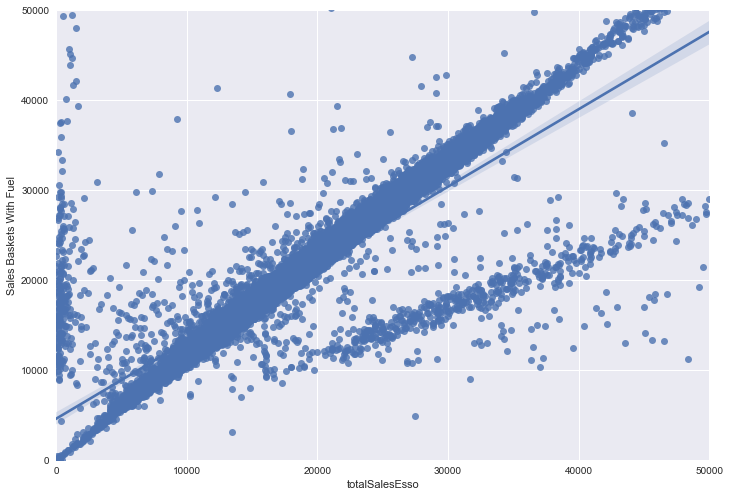

In [65]:
ax = sns.regplot(x="totalSalesEsso", y="Sales Baskets With Fuel",\
                 data=tesco_data_2).set(xlim=(0,50000),ylim=(0,50000))
plt.show(ax)

In [69]:
tesco_data_2.totalSalesEsso.quantile([0.005,0.995])

0.01    1,583.55
0.99   45,048.48
Name: totalSalesEsso, dtype: float64

In [70]:
tesco_data_3 = tesco_data_2.query('0 <= totalSalesEsso <= 50000')

In [72]:
#ax = sns.scatterplot(x="totalSalesEsso", y="Sales Baskets With Fuel", data=tesco_data_2)

ax = sns.regplot(x="totalSalesEsso", y="Sales Baskets With Fuel", data=tesco_data_3).set(xlim=(0,60000),ylim=(0,60000))
plt.show(ax)

In [85]:
tesco_data_3['diff_shop_esso'] = tesco_data_3['Sales Baskets With Fuel']- tesco_data_3['totalSalesEsso']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [86]:
tesco_data_3['diff_shop_esso'].describe()

count    70,762.00
mean      2,173.79
std       2,300.25
min     -37,143.15
25%       1,623.00
50%       2,114.74
75%       2,715.54
max      59,399.01
Name: diff_shop_esso, dtype: float64

In [87]:
(tesco_data_3['totalSalesEsso'] == 0).sum()
tesco_data_4 = tesco_data_3.query('totalSalesEsso != 0')
tesco_data_4['pct_dev'] = tesco_data_3['diff_shop_esso']/tesco_data_3.totalSalesEsso

4

In [95]:
tesco_data_4.pct_dev.describe()

count   70,758.00
mean         0.97
std        162.21
min         -1.00
25%          0.10
50%          0.13
75%          0.16
max     43,109.50
Name: pct_dev, dtype: float64

In [97]:
tesco_data_4.pct_dev.quantile([0.02,0.99])

0.02   0.06
0.99   0.34
Name: pct_dev, dtype: float64

In [105]:
#tesco_data_4.pct_dev.quantile([0.02,0.99])
tesco_data_5 = tesco_data_4.query('-0.1 <= pct_dev <= 0.5')
sns.distplot(tesco_data_5.pct_dev)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [102]:
tesco_data_5.pct_dev.describe()

count   69,641.00
mean         0.13
std          0.04
min         -0.10
25%          0.10
50%          0.13
75%          0.16
max          0.50
Name: pct_dev, dtype: float64

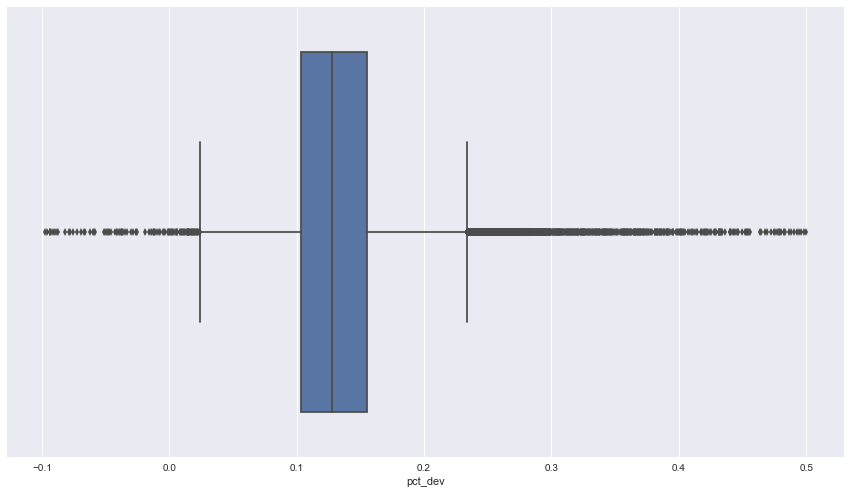

In [109]:
sns.set(rc={'figure.figsize':(15,8.27)})
sns.boxplot(tesco_data_5.pct_dev)

In [114]:
mean_pct_dev = tesco_data_5['pct_dev'].mean()
median_pct_dev = tesco_data_5['pct_dev'].median()
ax_box = sns.boxplot(tesco_data_5.pct_dev)
ax_box.axvline(mean_pct_dev, color='r', linestyle='--')
ax_box.axvline(median_pct_dev, color='g', linestyle='-')
ax_box.legend({'Mean':mean_pct_dev,'Median':median_pct_dev})

In [119]:
tesco_data_5['pct_dev'].quantile(np.array(list(range(0,105,5)))*0.01)

0.00   -0.10
0.05    0.07
0.10    0.08
0.15    0.09
0.20    0.10
0.25    0.10
0.30    0.11
0.35    0.11
0.40    0.12
0.45    0.12
0.50    0.13
0.55    0.13
0.60    0.14
0.65    0.14
0.70    0.15
0.75    0.16
0.80    0.16
0.85    0.17
0.90    0.18
0.95    0.20
1.00    0.50
Name: pct_dev, dtype: float64

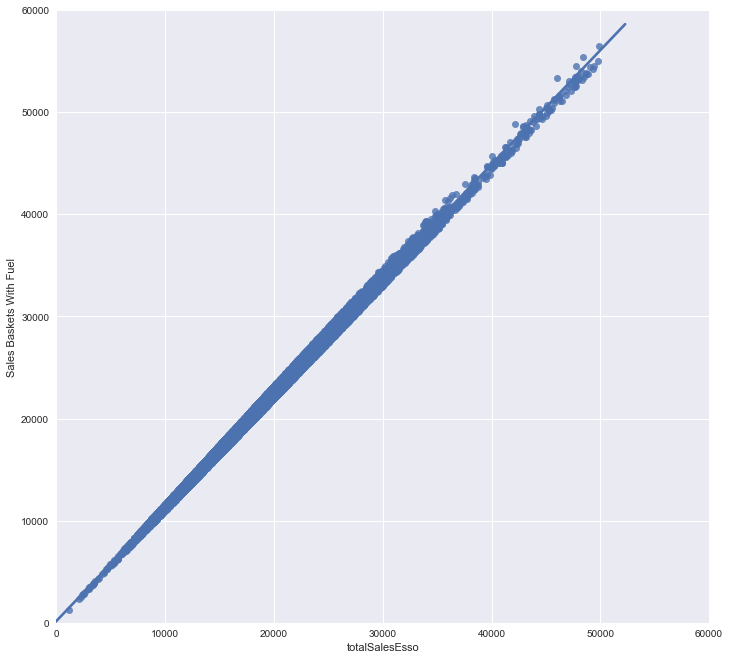

In [123]:
#tesco_data_4.pct_dev.quantile([0.02,0.99])
tesco_data_6 = tesco_data_5.query('0.10 <= pct_dev <= 0.16')
ax = sns.regplot(x="totalSalesEsso", y="Sales Baskets With Fuel", data=tesco_data_6).set(xlim=(0,60000),ylim=(0,60000))
plt.show(ax)

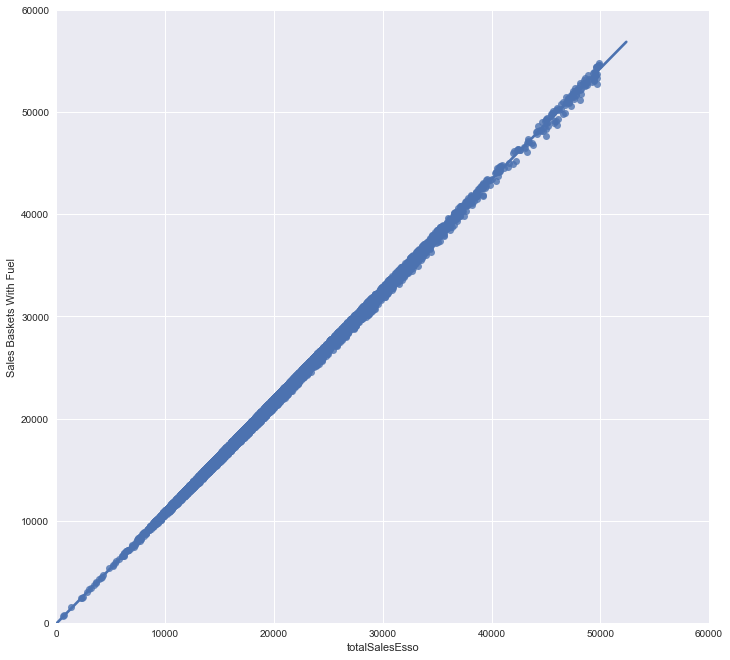

In [122]:
#tesco_data_4.pct_dev.quantile([0.02,0.99])
sns.set(rc={'figure.figsize':(11.7,11.27)})
tesco_data_7 = tesco_data_5.query('0.05 <= pct_dev <= 0.10')
ax = sns.regplot(x="totalSalesEsso", y="Sales Baskets With Fuel", data=tesco_data_7).set(xlim=(0,60000),ylim=(0,60000))
plt.show(ax)

In [125]:
#tesco_data_4.pct_dev.quantile([0.02,0.99])
sns.set(rc={'figure.figsize':(11.7,11.27)})
tesco_data_8 = tesco_data_5.query('0 <= pct_dev <= .05')
ax = sns.regplot(x="totalSalesEsso", y="Sales Baskets With Fuel", data=tesco_data_8).set(xlim=(0,60000),ylim=(0,60000))
plt.show(ax)

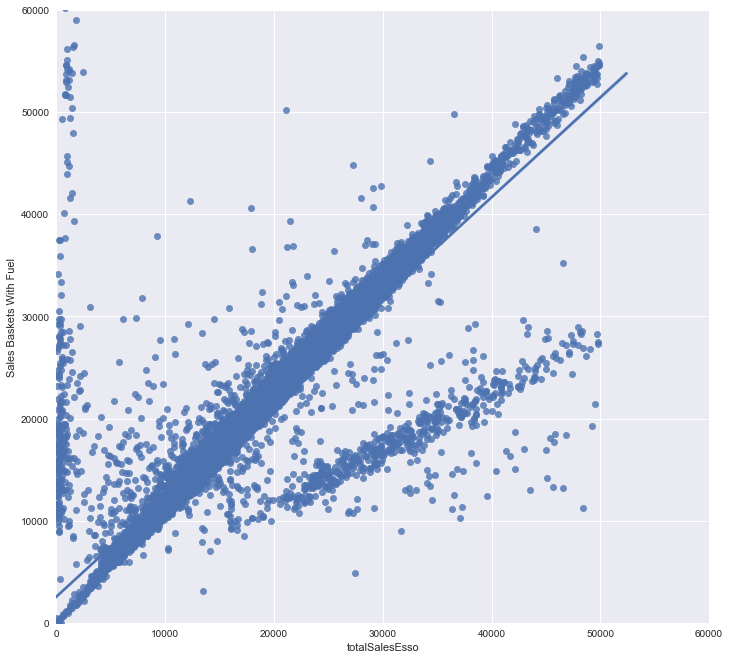

In [126]:
ax = sns.regplot(x="totalSalesEsso", y="Sales Baskets With Fuel", data=tesco_data_4).set(xlim=(0,60000),ylim=(0,60000))
plt.show(ax)

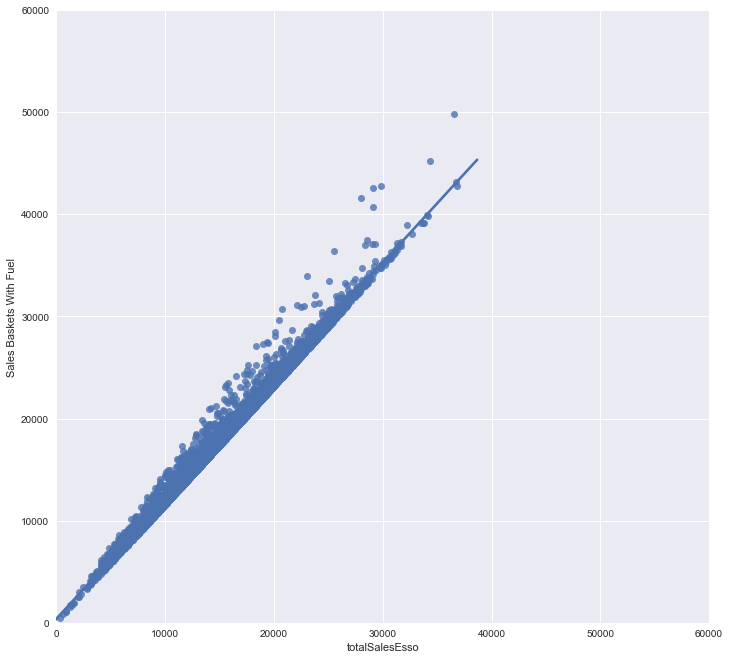

In [127]:
#tesco_data_4.pct_dev.quantile([0.02,0.99])
tesco_data_9 = tesco_data_5.query('0.16 < pct_dev <= 1')
ax = sns.regplot(x="totalSalesEsso", y="Sales Baskets With Fuel", data=tesco_data_9).set(xlim=(0,60000),ylim=(0,60000))
plt.show(ax)

In [128]:
from scipy import stats

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)

In [129]:
tesco_data_5.columns

Index(['Site Number', 'Site Name', 'Transaction Date', 'Total Sales Value',
       'Total Baskets', 'Sales Baskets With Fuel', 'Baskets With Fuel',
       'Site ID', 'PBL', 'CRUSO_priceADO', 'CRUSO_priceUL95', 'volumeADO',
       'volumeUL95', 'sales_valADO', 'sales_valUL95', 'totalSalesEsso',
       'pct_dev', 'diff_shop_esso'],
      dtype='object')

In [130]:
sites_med = tesco_data_5.query('0.10 <= pct_dev <= 0.16')['Site Name'].unique().tolist()

In [132]:
len(sites_med)

196

In [ ]:
tesco_data_4